In [ ]:
! pip install pymc3
! pip install pandas
! pip install arviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 872 kB 14.4 MB/s 
     |████████████████████████████████| 1.8 MB 49.0 MB/s 
  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529963 sha256=66bc1bd9aa9bdfef86d4515617965ca28f76a68e3c794baac5b415f6ef59d9f0
  Stored in directory: /root/.cache/pip/wheels/0e/41/d2/82c7b771236f987def7fe2e51855cce22b270327f3fedec57c
Successfully built theano-pymc
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact
import pymc3 as pm
import pandas as pd
import arviz as az
import seaborn as sns

import warnings # the warning spam is pointless and annoying
warnings.simplefilter(action="ignore", category=FutureWarning)

Populating the interactive namespace from numpy and matplotlib


In [ ]:
weather = pd.read_csv("weather.csv", sep=",", header=0)
weather

,Outdoor Drybulb Temperature [C],Relative Humidity [%],Diffuse Solar Radiation [W/m2],Direct Solar Radiation [W/m2],6h Prediction Outdoor Drybulb Temperature [C],12h Prediction Outdoor Drybulb Temperature [C],24h Prediction Outdoor Drybulb Temperature [C],6h Prediction Relative Humidity [%],12h Prediction Relative Humidity [%],24h Prediction Relative Humidity [%],6h Prediction Diffuse Solar Radiation [W/m2],12h Prediction Diffuse Solar Radiation [W/m2],24h Prediction Diffuse Solar Radiation [W/m2],6h Prediction Direct Solar Radiation [W/m2],12h Prediction Direct Solar Radiation [W/m2],24h Prediction Direct Solar Radiation [W/m2]
0,20.0,84.0,0.0,0.0,18.3,22.8,20.0,81.0,68.0,81.0,25.0,964.0,0.0,100.0,815.0,0.0
1,20.1,79.0,0.0,0.0,19.4,22.8,19.4,79.0,71.0,87.0,201.0,966.0,0.0,444.0,747.0,0.0
2,19.7,78.0,0.0,0.0,21.1,22.2,19.4,73.0,73.0,87.0,420.0,683.0,0.0,592.0,291.0,0.0
3,19.3,78.0,0.0,0.0,22.2,22.8,19.4,71.0,71.0,90.0,554.0,522.0,0.0,491.0,153.0,0.0
4,18.9,78.0,0.0,0.0,21.7,22.2,18.9,73.0,71.0,90.0,778.0,444.0,0.0,734.0,174.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,20.6,84.0,26.0,130.0,20.1,19.4,20.6,79.0,79.0,73.0,0.0,201.0,27.0,0.0,444.0,143.0
8756,21.1,81.0,0.0,0.0,19.7,21.1,20.0,78.0,73.0,76.0,0.0,420.0,0.0,0.0,592.0,0.0
8757,21.7,79.0,0.0,0.0,19.3,22.2,20.6,78.0,71.0,70.0,0.0,554.0,0.0,0.0,491.0,0.0
8758,21.3,76.0,0.0,0.0,18.9,21.7,20.6,78.0,73.0,73.0,0.0,778.0,0.0,0.0,734.0,0.0


In [ ]:
weather.isnull().sum()

In [ ]:
weather.dtypes

Text(0.5, 1.0, 'Direct Solar Radiation [W/m2] vs Time [H]')

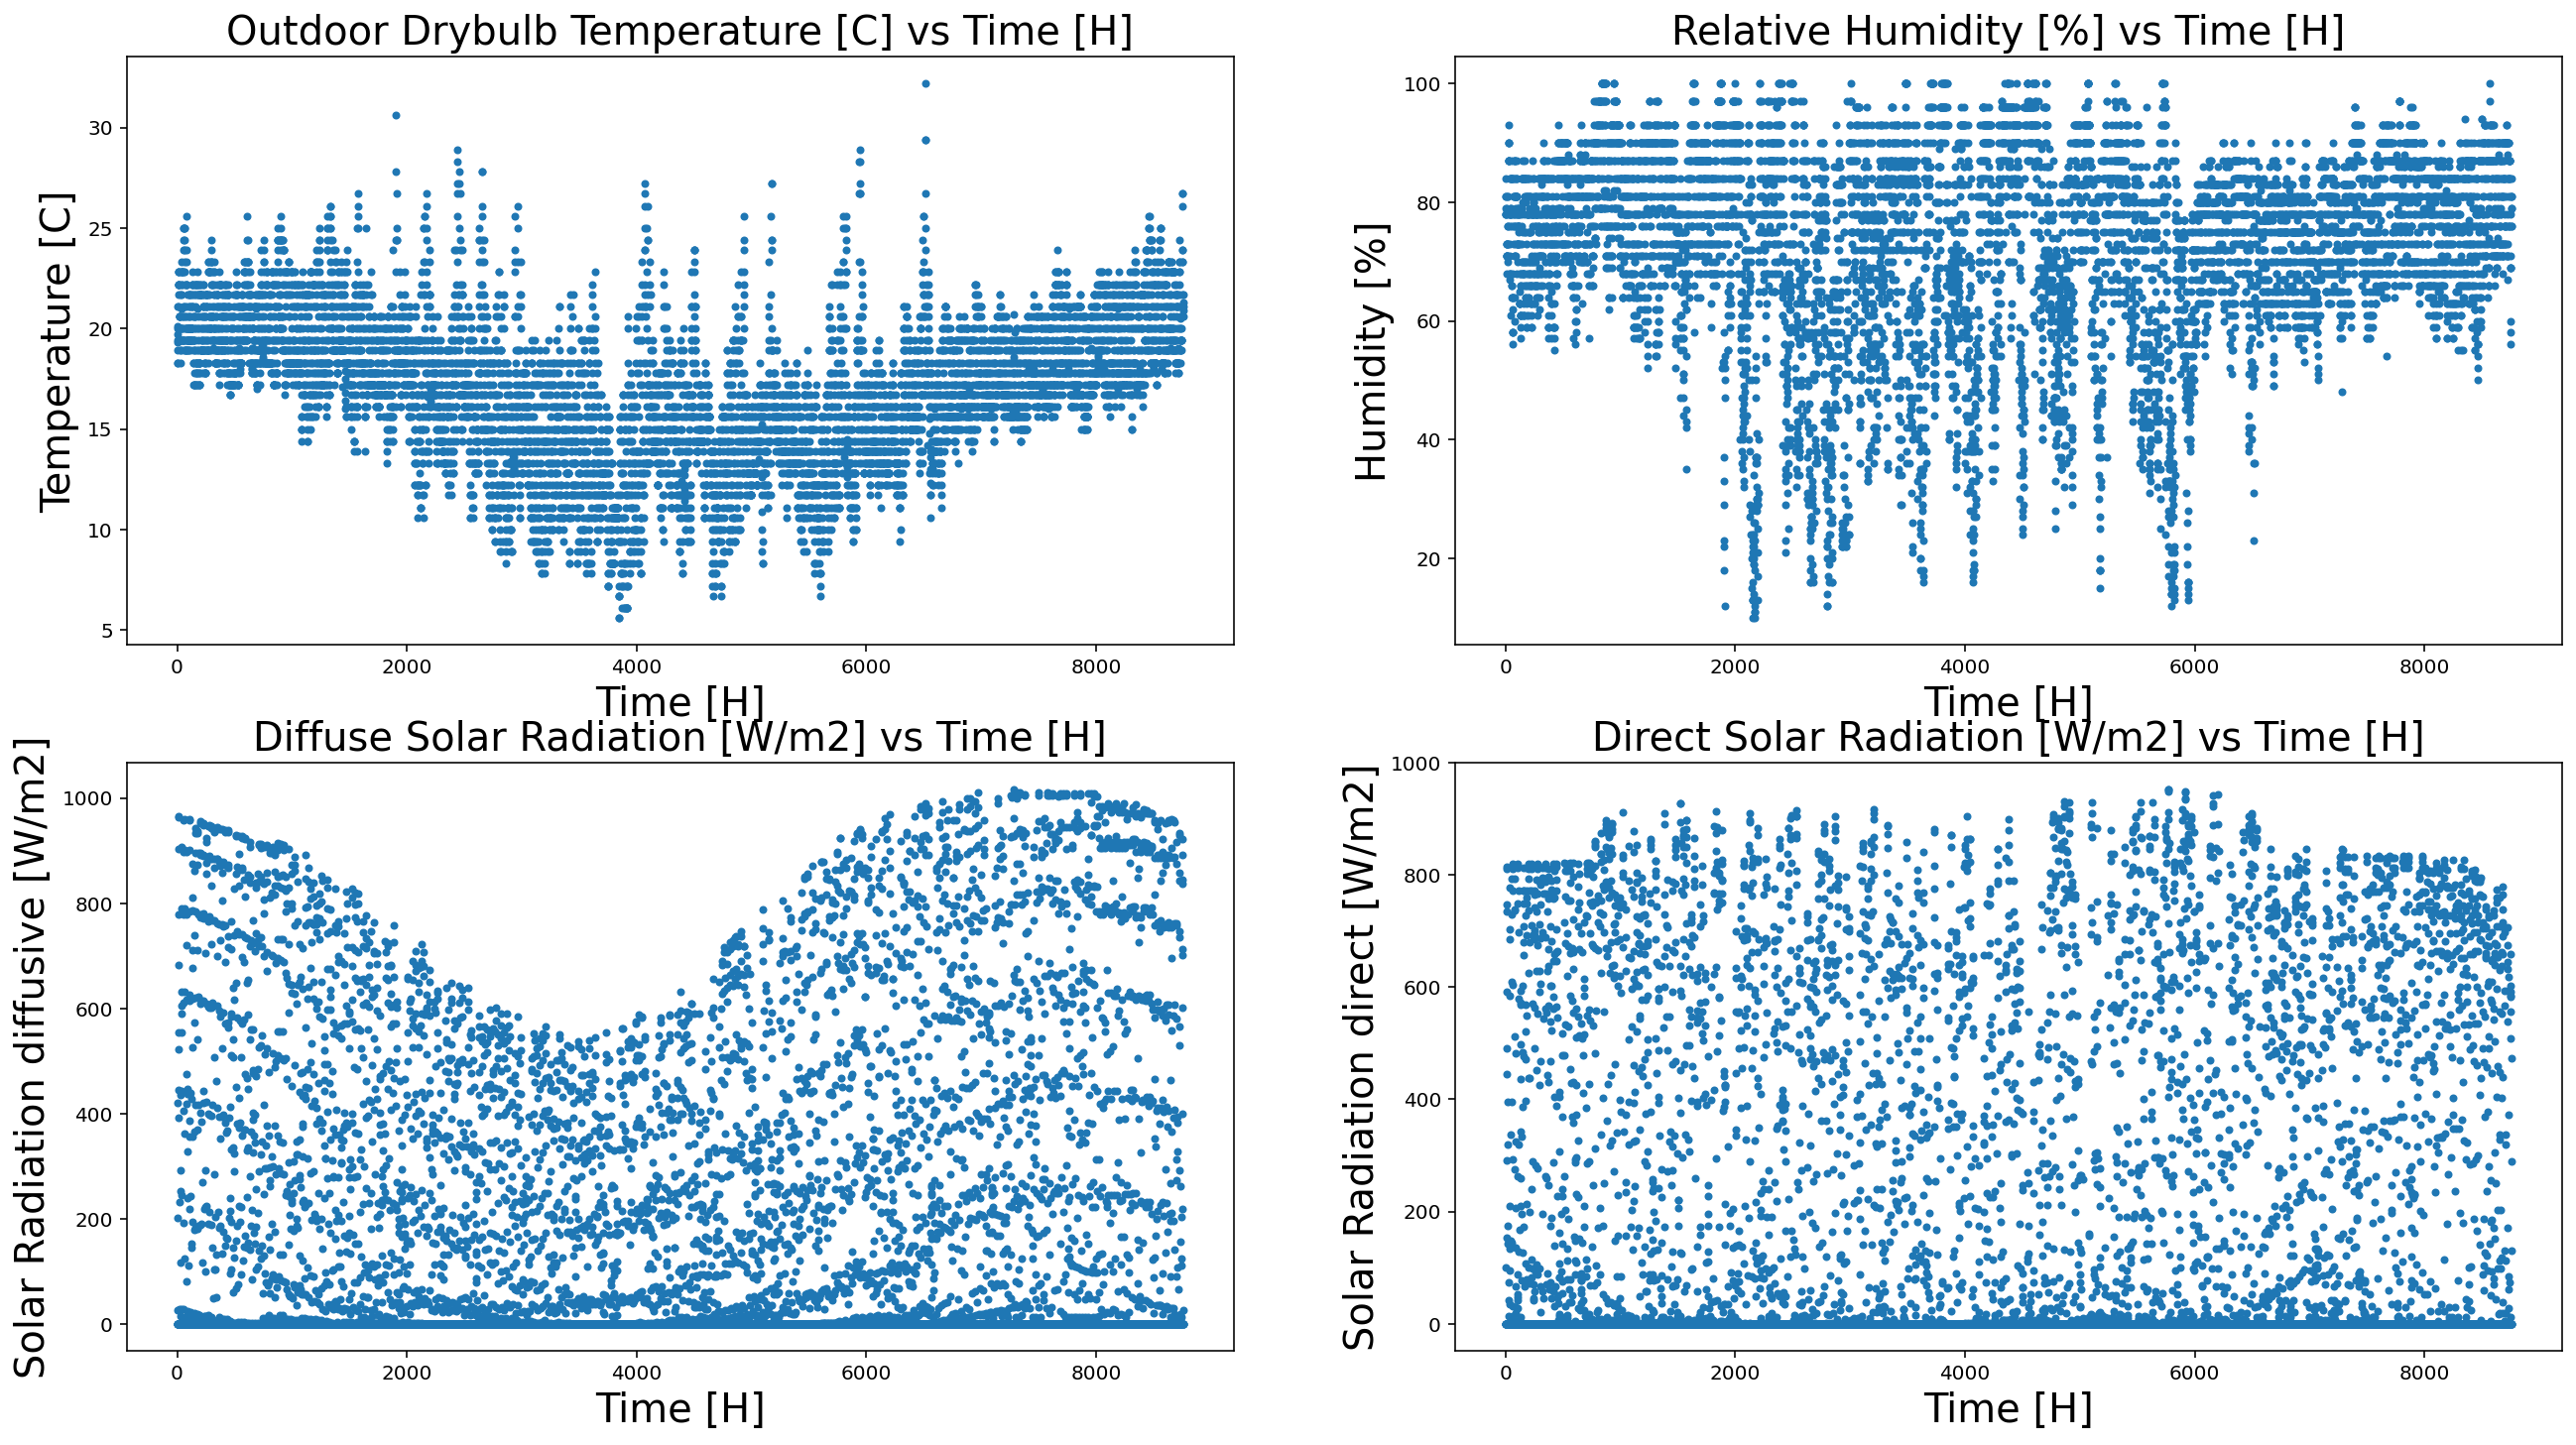

In [ ]:
fig = figure(1, [22, 12])
fig.add_subplot(221)
plot(weather['Outdoor Drybulb Temperature [C]'],'.')
xlabel('Time [H]', fontsize=20)
ylabel('Temperature [C]', fontsize=20)
title('Outdoor Drybulb Temperature [C] vs Time [H]', fontsize = 20)

fig.add_subplot(222)
plot(weather['Relative Humidity [%]'],'.')
xlabel('Time [H]', fontsize=20)
ylabel('Humidity [%]', fontsize=20)
title('Relative Humidity [%] vs Time [H]', fontsize = 20)

fig.add_subplot(223)
plot(weather['Diffuse Solar Radiation [W/m2]'],'.')
xlabel('Time [H]', fontsize=20)
ylabel('Solar Radiation diffusive [W/m2]', fontsize=20)
title('Diffuse Solar Radiation [W/m2] vs Time [H]', fontsize = 20) 

fig.add_subplot(224)
plot(weather['Direct Solar Radiation [W/m2]'],'.')
xlabel('Time [H]', fontsize=20)
ylabel('Solar Radiation direct [W/m2]', fontsize=20)
title('Direct Solar Radiation [W/m2] vs Time [H]', fontsize = 20)

In [ ]:
pricing = pd.read_csv("pricing.csv", sep=",", header=0)
pricing

,Electricity Pricing [$],6h Prediction Electricity Pricing [$],12h Prediction Electricity Pricing [$],24h Prediction Electricity Pricing [$]
0,0.22,0.22,0.22,0.22
1,0.22,0.22,0.22,0.22
2,0.22,0.22,0.22,0.22
3,0.22,0.22,0.22,0.22
4,0.22,0.22,0.54,0.22
...,...,...,...,...
8755,0.54,0.22,0.22,0.54
8756,0.54,0.22,0.22,0.54
8757,0.22,0.22,0.22,0.22
8758,0.22,0.22,0.22,0.22


Text(0.5, 1.0, 'Electricity Pricing [$] vs Time [H]')

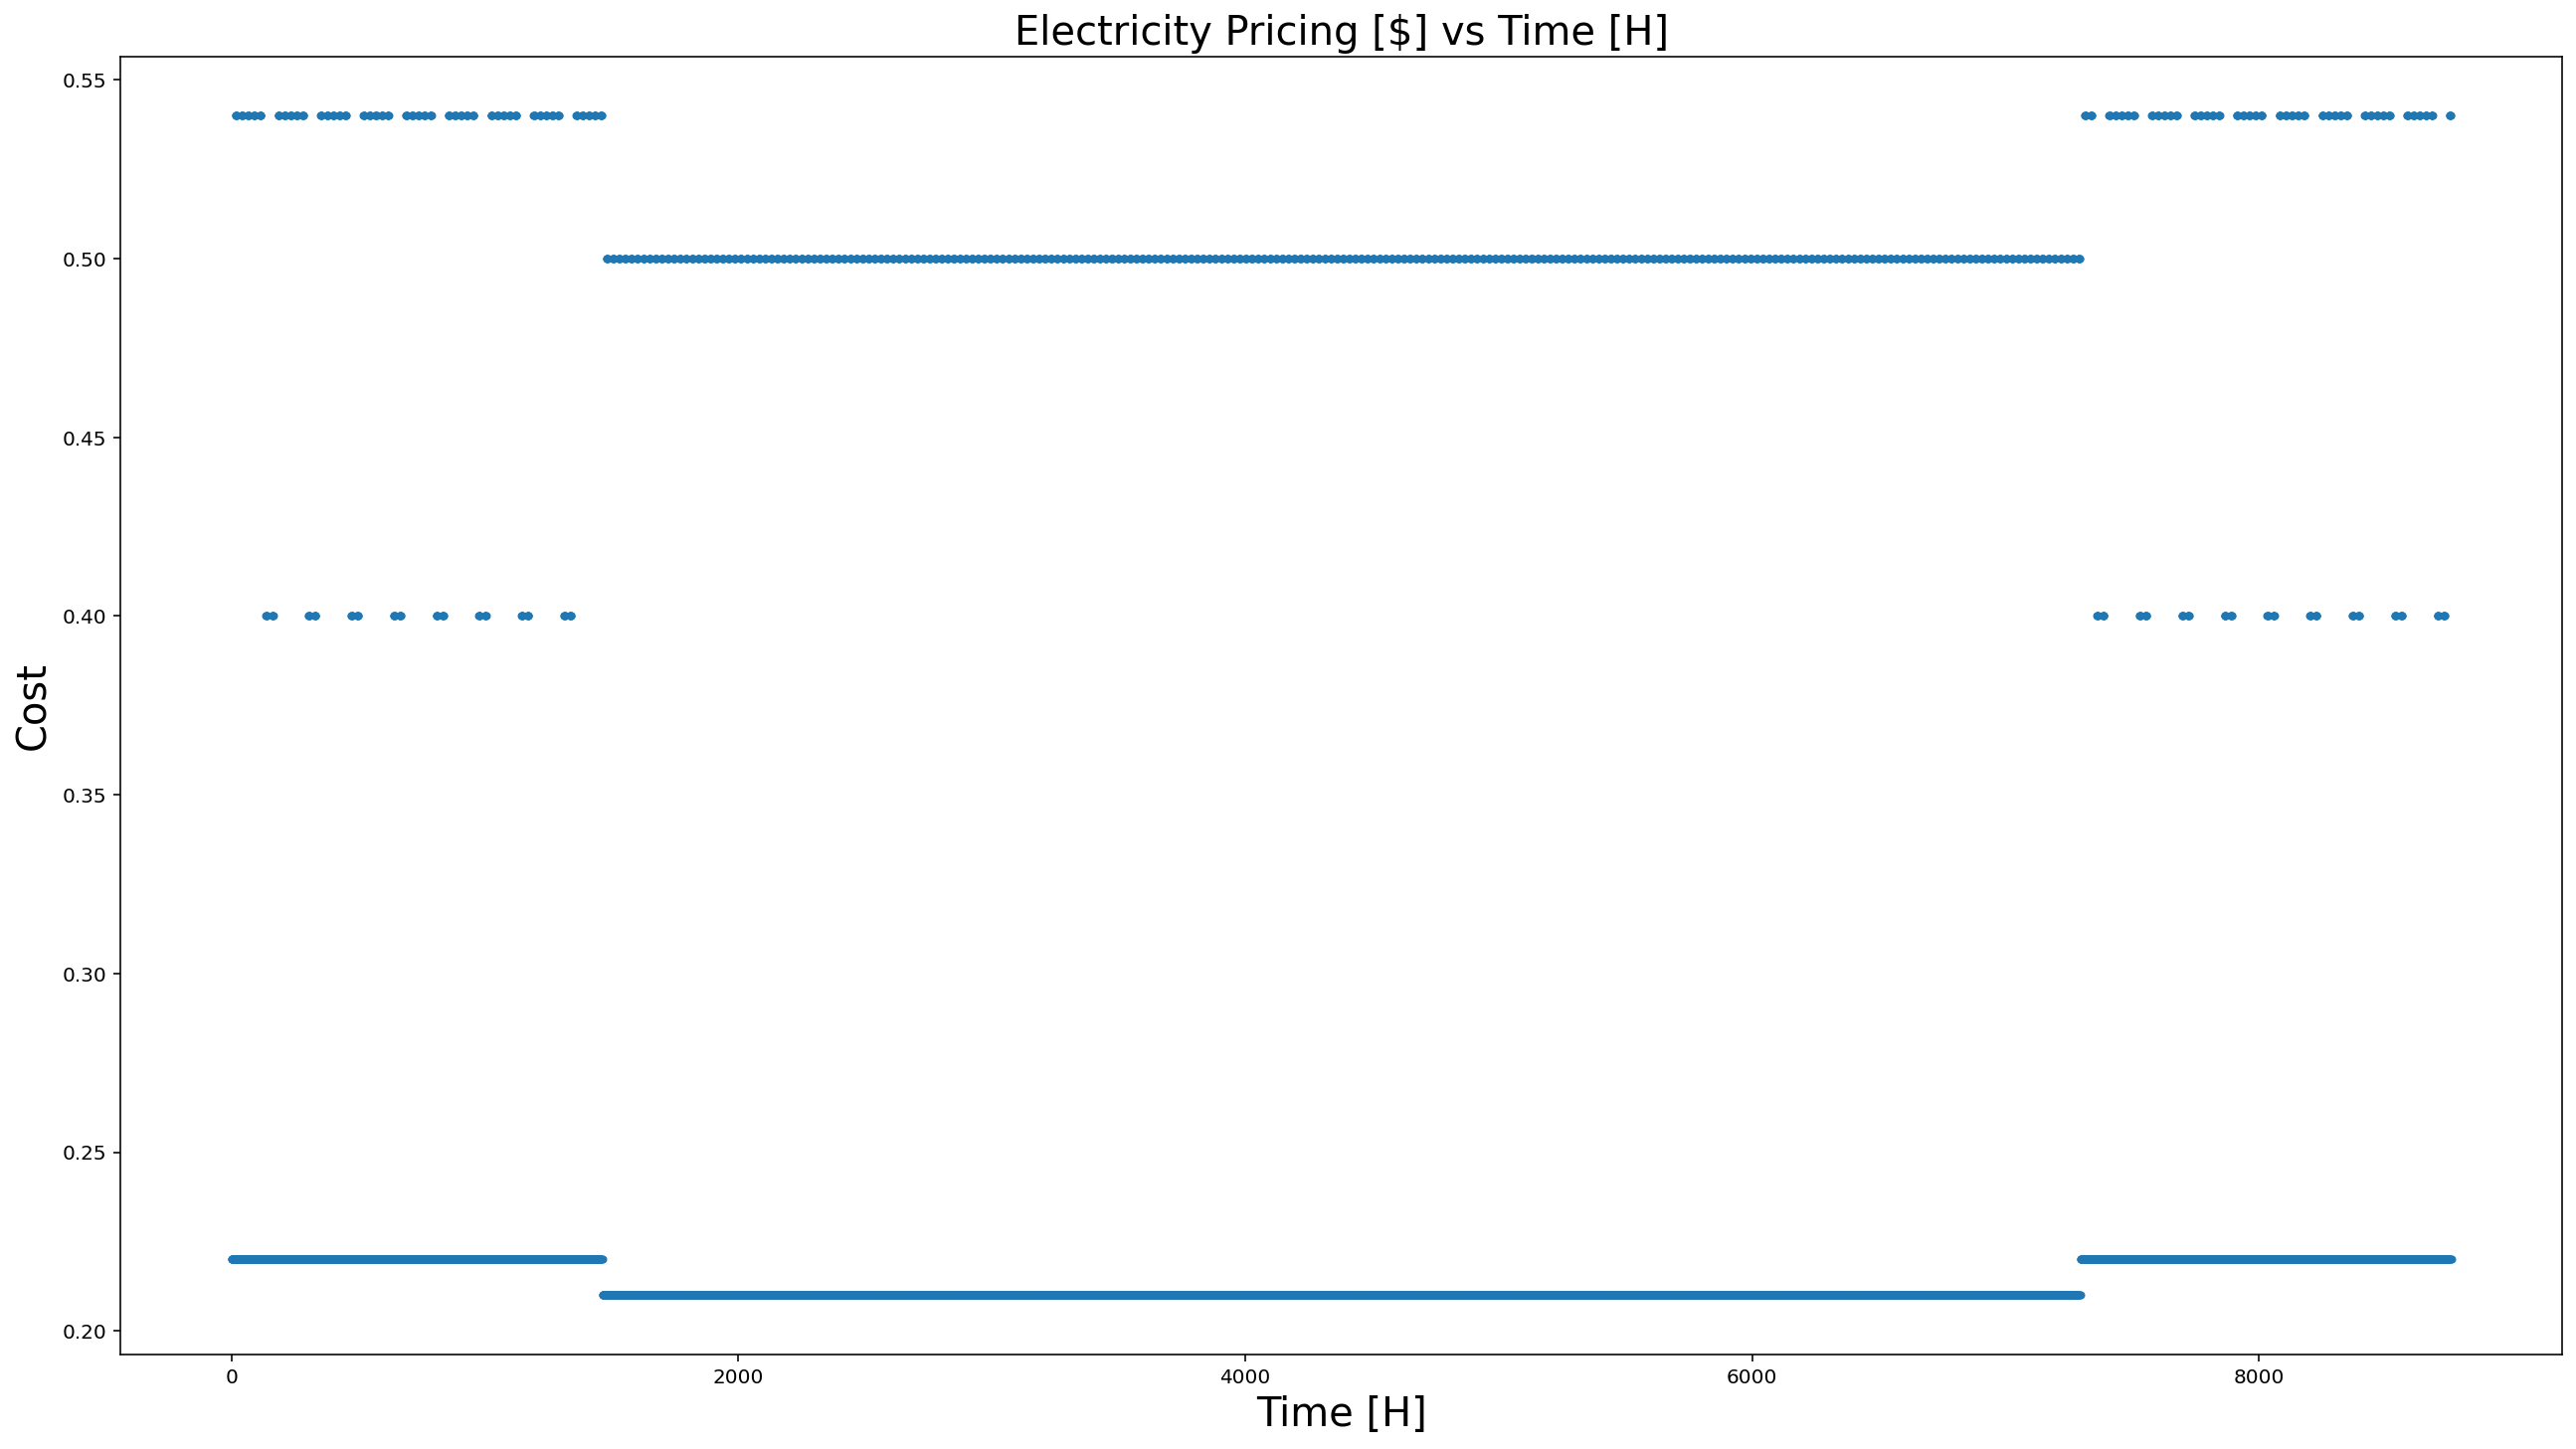

In [ ]:
fig = figure(1, [22, 12])
# fig.add_subplot(221)
plot(pricing['Electricity Pricing [$]'],'.')
xlabel('Time [H]', fontsize=20)
ylabel('Cost', fontsize=20)
title('Electricity Pricing [$] vs Time [H]', fontsize = 20)

# fig.add_subplot(222)
# plot(weather['Relative Humidity [%]'],'.')
# xlabel('Time [H]', fontsize=20)
# ylabel('Humidity [%]', fontsize=20)
# title('Relative Humidity [%] vs Time [H]', fontsize = 20)

# fig.add_subplot(223)
# plot(weather['Diffuse Solar Radiation [W/m2]'],'.')
# xlabel('Time [H]', fontsize=20)
# ylabel('Solar Radiation diffusive [W/m2]', fontsize=20)
# title('Diffuse Solar Radiation [W/m2] vs Time [H]', fontsize = 20) 

# fig.add_subplot(224)
# plot(weather['Direct Solar Radiation [W/m2]'],'.')
# xlabel('Time [H]', fontsize=20)
# ylabel('Solar Radiation direct [W/m2]', fontsize=20)
# title('Direct Solar Radiation [W/m2] vs Time [H]', fontsize = 20)

Text(0.5, 1.0, 'Electricity Pricing [$] vs Time [H]')

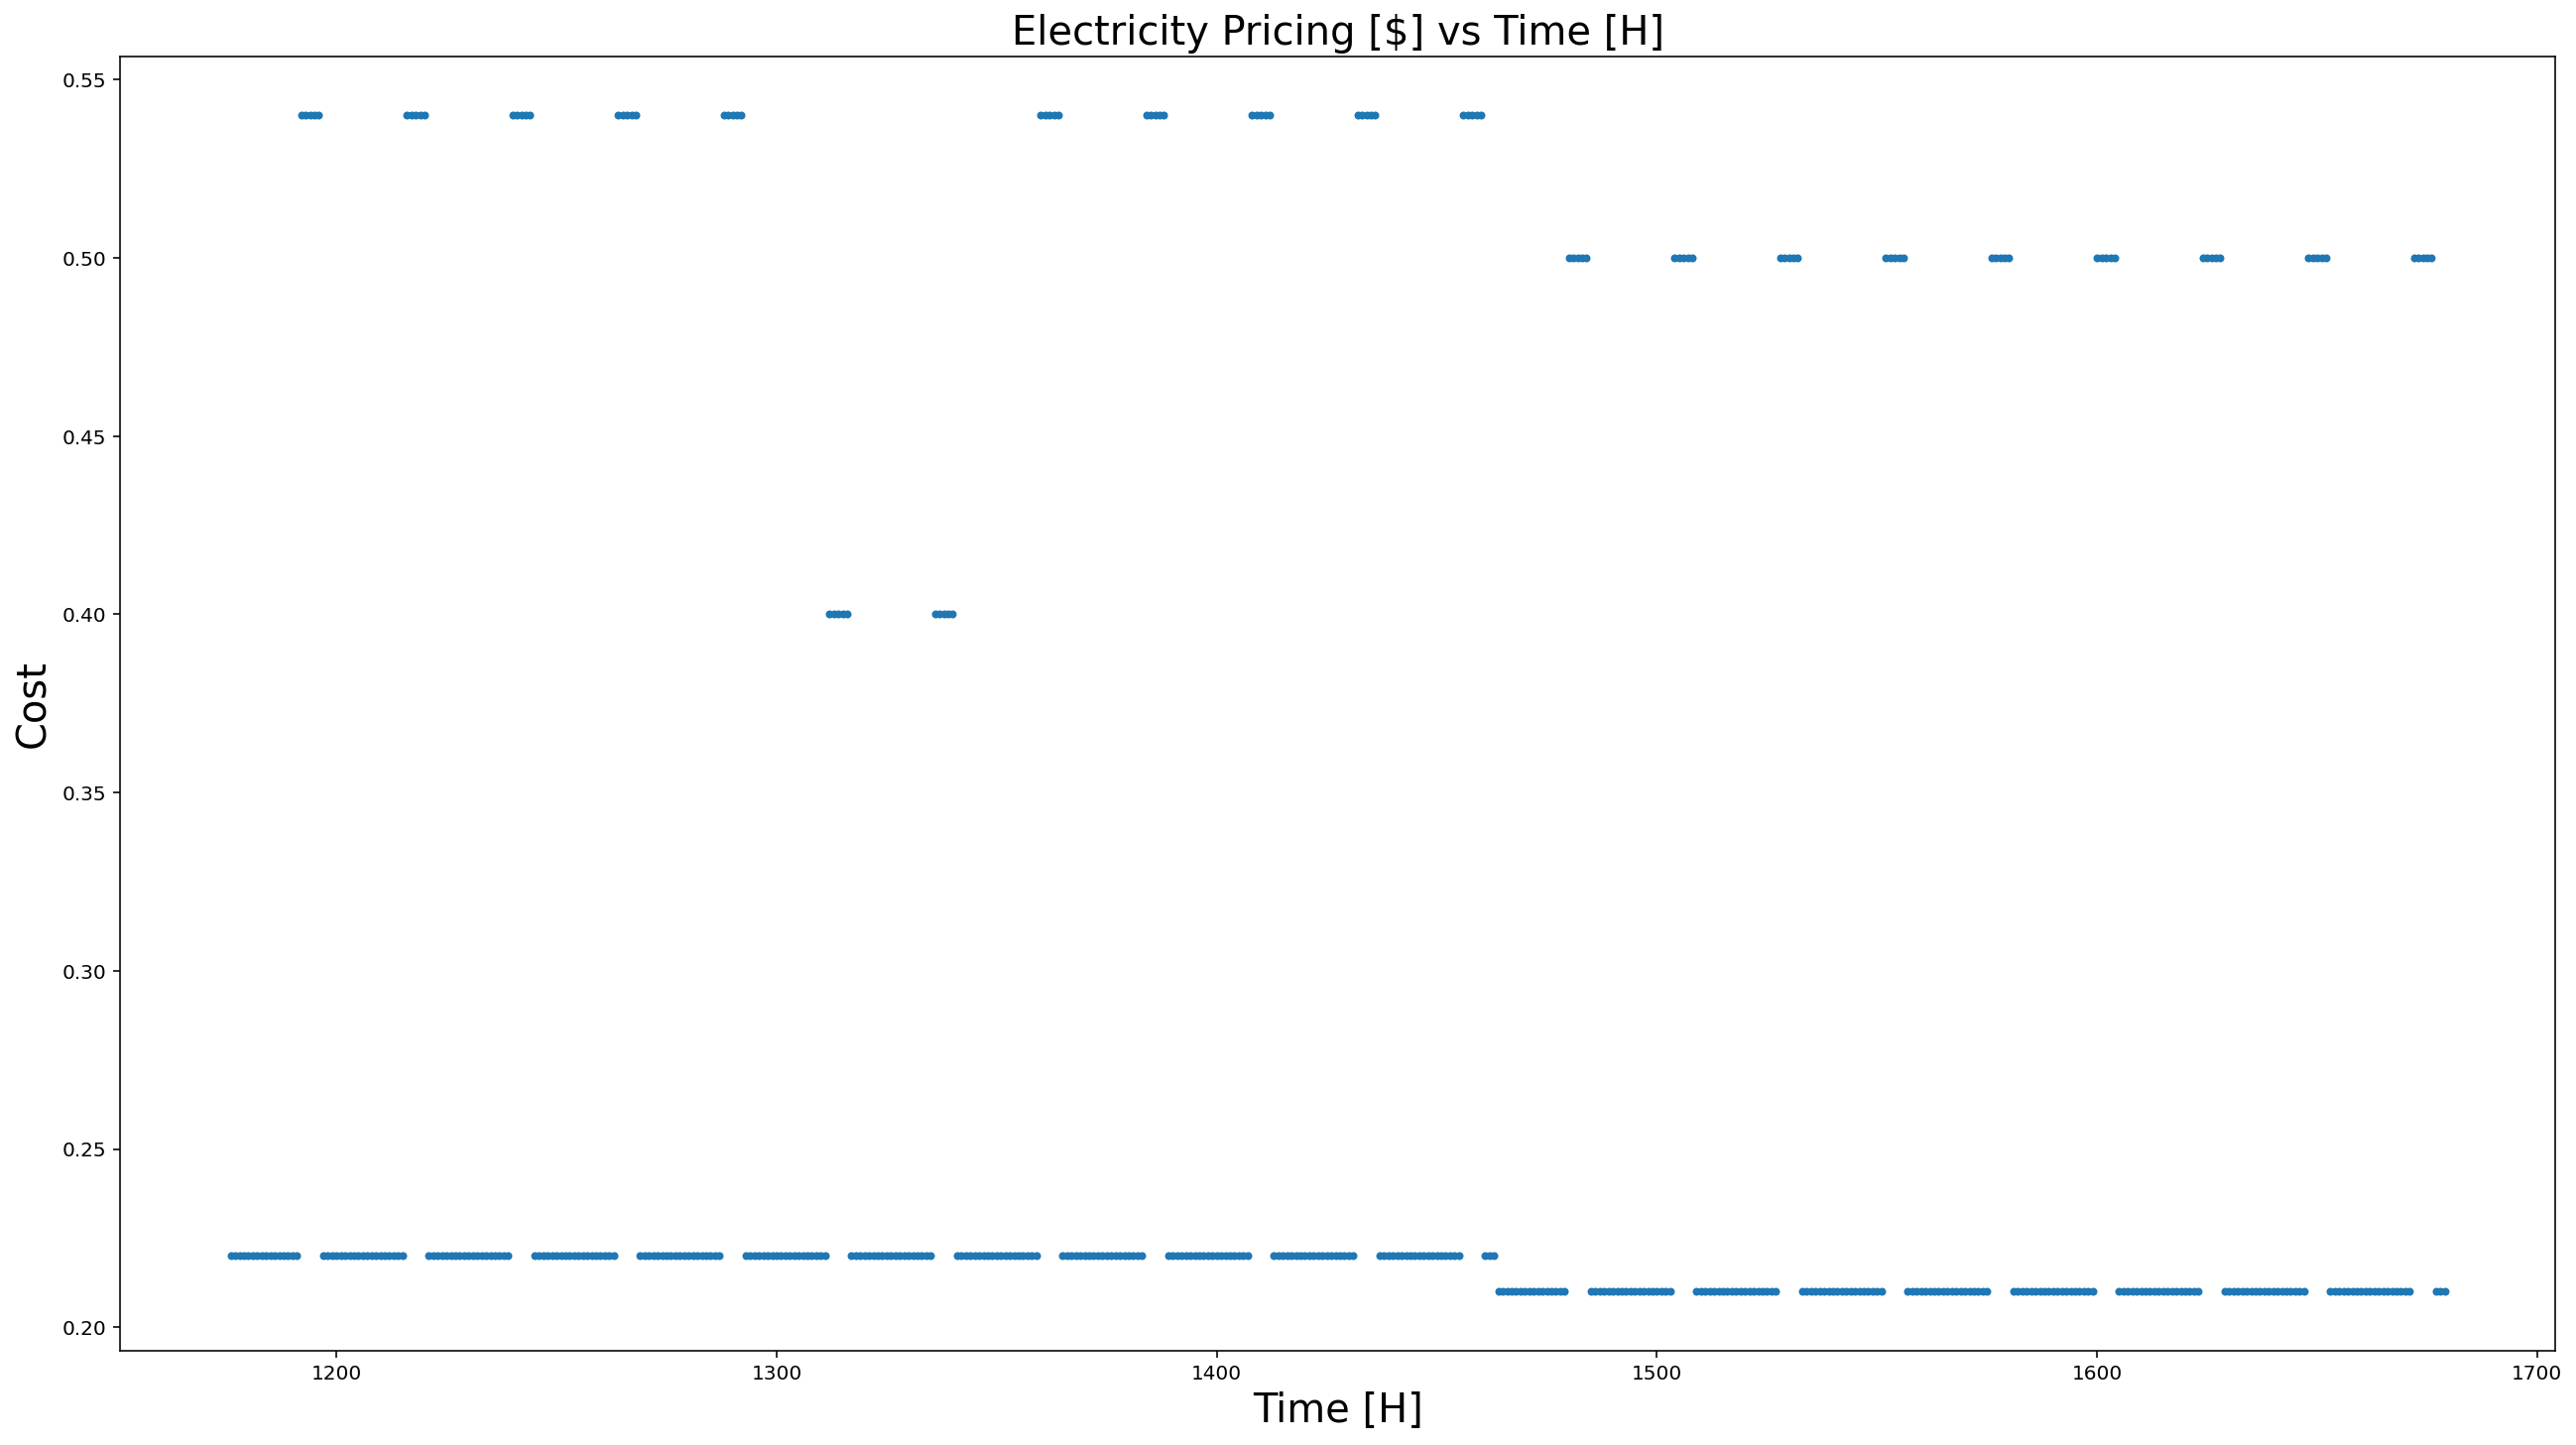

In [ ]:
fig = figure(1, [22, 12])
# fig.add_subplot(221)
plot(pricing['Electricity Pricing [$]'][24*7*7:24*7*10],'.')
xlabel('Time [H]', fontsize=20)
ylabel('Cost', fontsize=20)
title('Electricity Pricing [$] vs Time [H]', fontsize = 20)

In [ ]:
carbon = pd.read_csv("carbon_intensity.csv", sep=",", header=0)
carbon

,kg_CO2/kWh
0,0.170724
1,0.157319
2,0.154503
3,0.150945
4,0.151820
...,...
8755,0.222553
8756,0.216094
8757,0.215501
8758,0.202315


Text(0.5, 1.0, 'Carbon Intensity [kg_CO2/kWh] vs Time [H]')

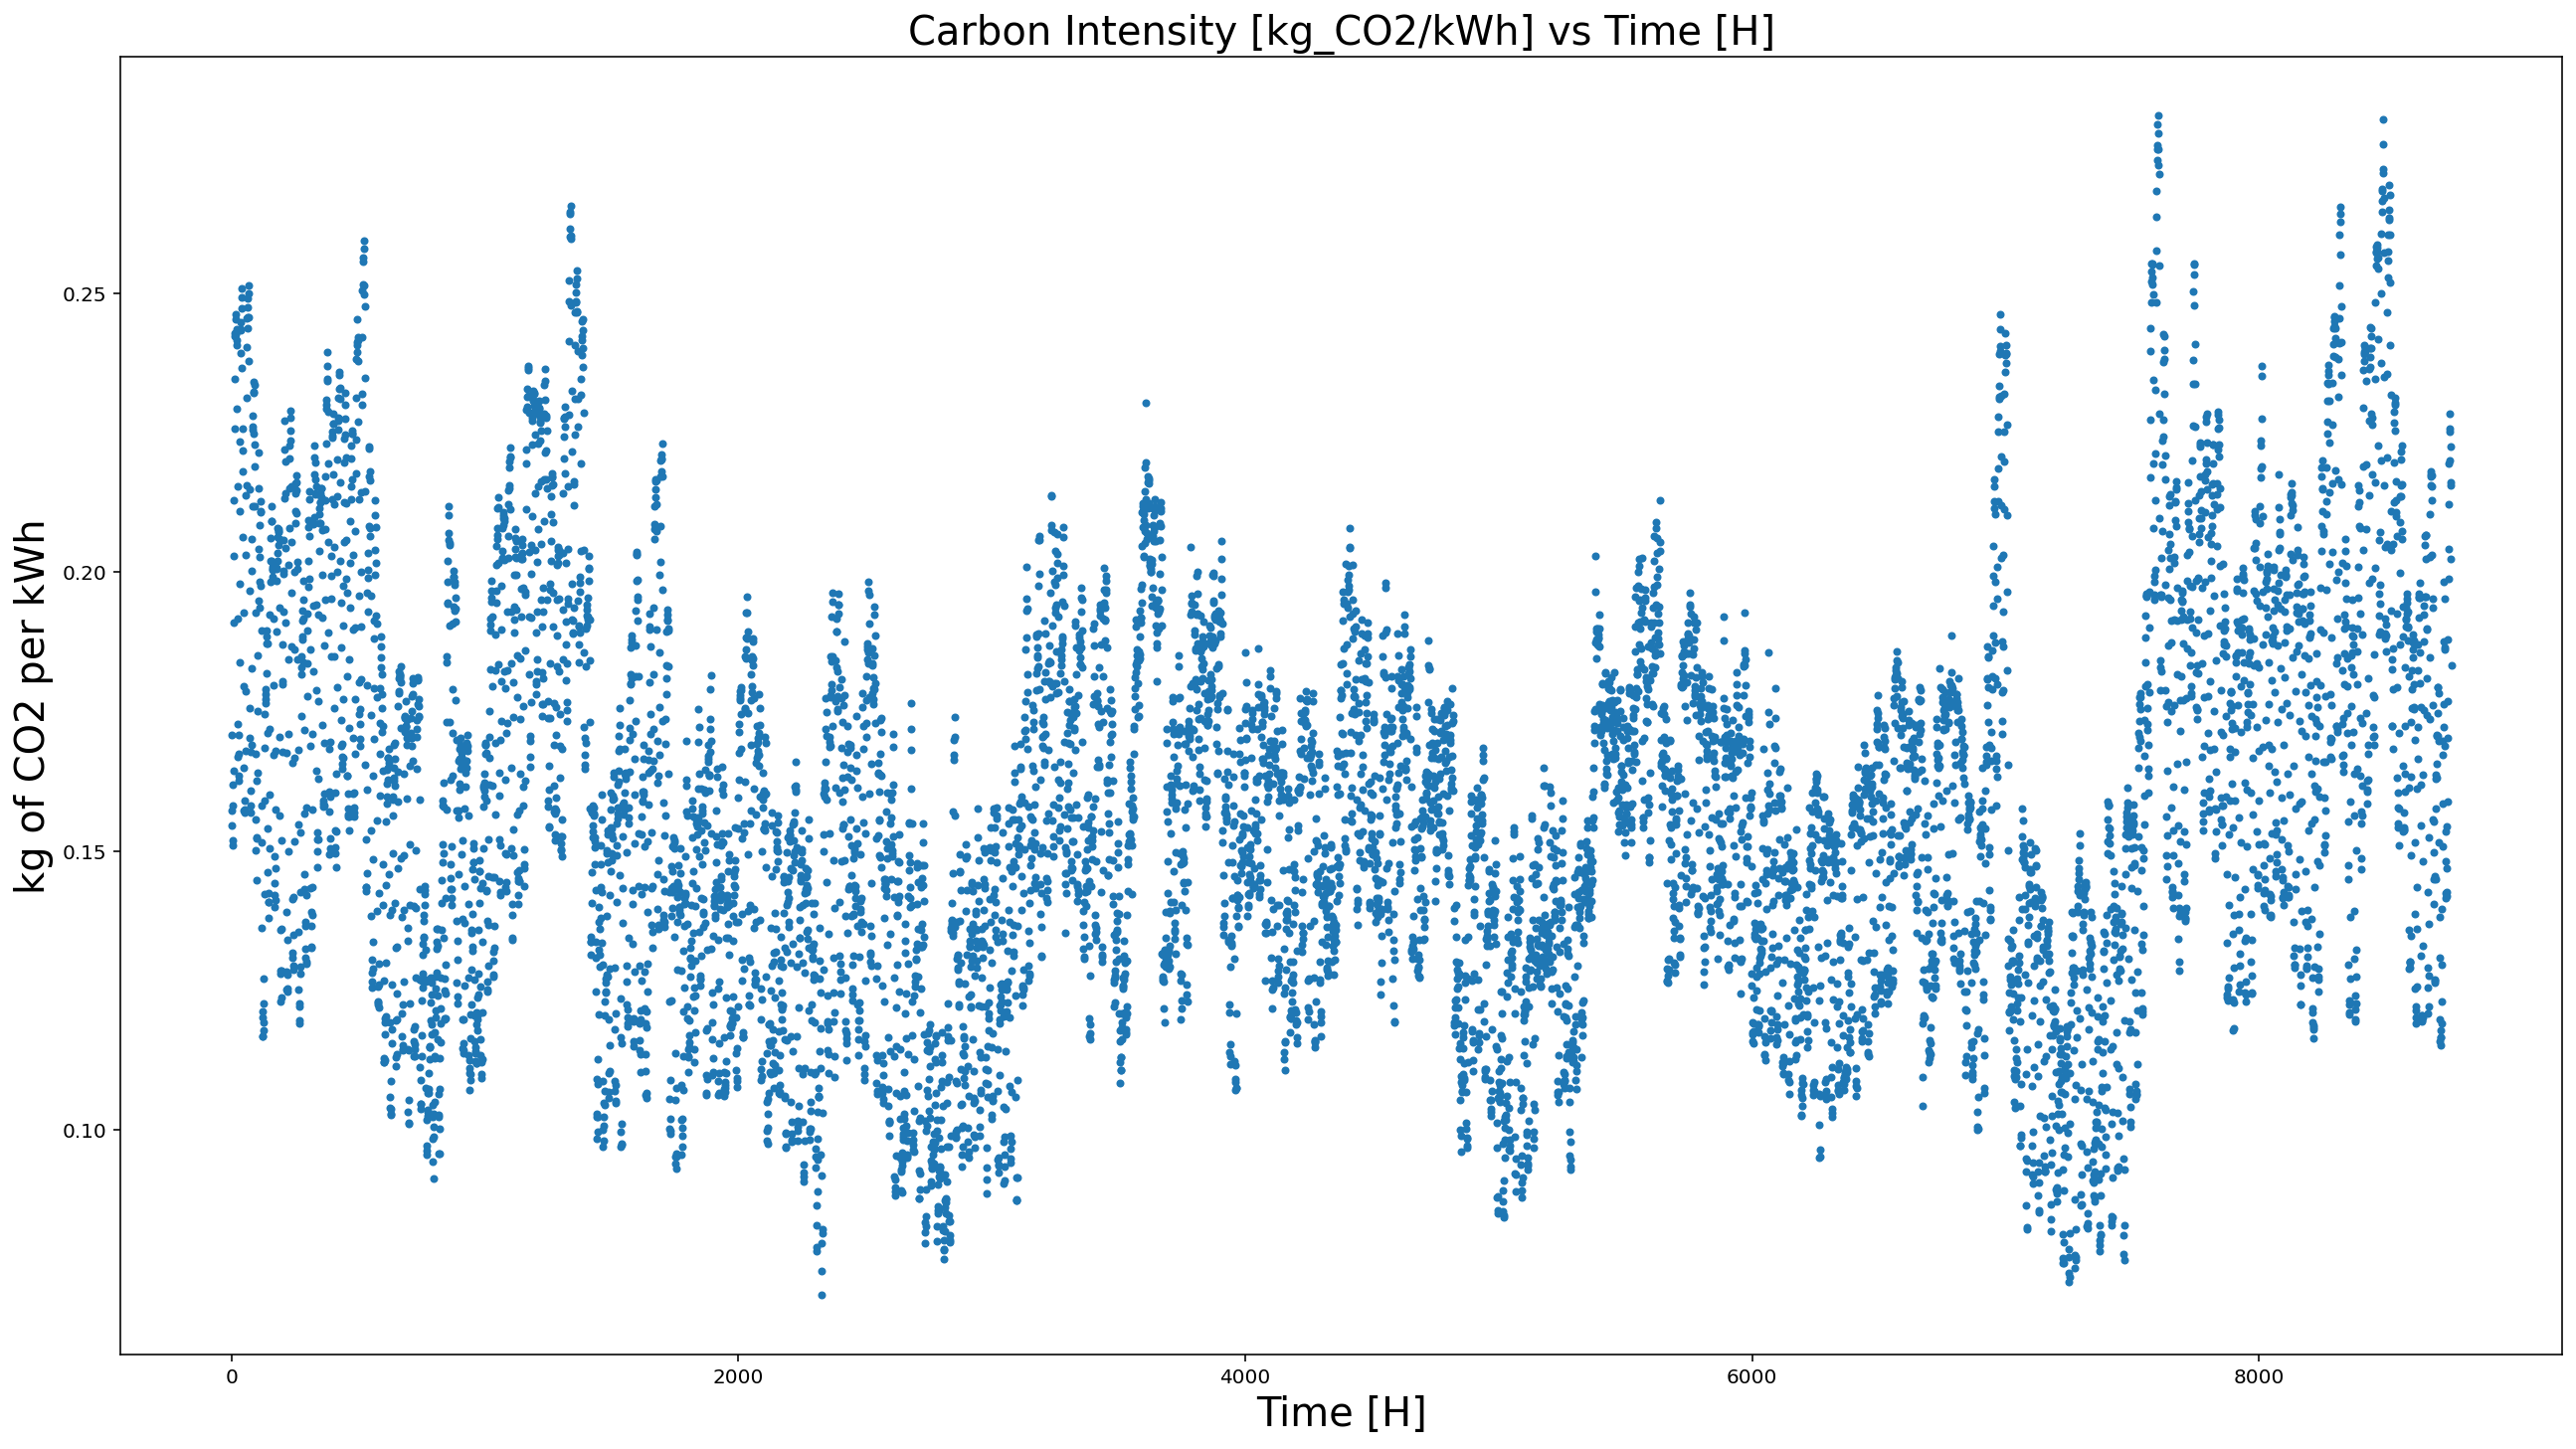

In [ ]:


fig = figure(1, [22, 12])
# fig.add_subplot(221)
plot(carbon['kg_CO2/kWh'],'.')
xlabel('Time [H]', fontsize=20)
ylabel('kg of CO2 per kWh', fontsize=20)
title('Carbon Intensity [kg_CO2/kWh] vs Time [H]', fontsize = 20)

In [ ]:
bd1 = pd.read_csv("Building_1.csv", sep=",", header=0)
bd2 = pd.read_csv("Building_2.csv", sep=",", header=0)
bd3 = pd.read_csv("Building_3.csv", sep=",", header=0)
bd4 = pd.read_csv("Building_4.csv", sep=",", header=0)
bd5 = pd.read_csv("Building_5.csv", sep=",", header=0)

bd1

,Month,Hour,Day Type,Daylight Savings Status,Indoor Temperature [C],Average Unmet Cooling Setpoint Difference [C],Indoor Relative Humidity [%],Equipment Electric Power [kWh],DHW Heating [kWh],Cooling Load [kWh],Heating Load [kWh],Solar Generation [W/kW]
0,7.0,24.0,7.0,0,NaN,NaN,NaN,2.275800,0,0,0,0.000000
1,8.0,1.0,1.0,0,NaN,NaN,NaN,0.851167,0,0,0,0.000000
2,8.0,2.0,1.0,0,NaN,NaN,NaN,0.834600,0,0,0,0.000000
3,8.0,3.0,1.0,0,NaN,NaN,NaN,0.838167,0,0,0,0.000000
4,8.0,4.0,1.0,0,NaN,NaN,NaN,1.478433,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,7.0,19.0,1.0,0,NaN,NaN,NaN,1.346883,0,0,0,8.004167
8756,7.0,20.0,1.0,0,NaN,NaN,NaN,2.566167,0,0,0,0.000000
8757,7.0,21.0,1.0,0,NaN,NaN,NaN,3.151700,0,0,0,0.000000
8758,7.0,22.0,1.0,0,NaN,NaN,NaN,3.021500,0,0,0,0.000000


Text(0.5, 1.0, 'DST vs Time [H]')

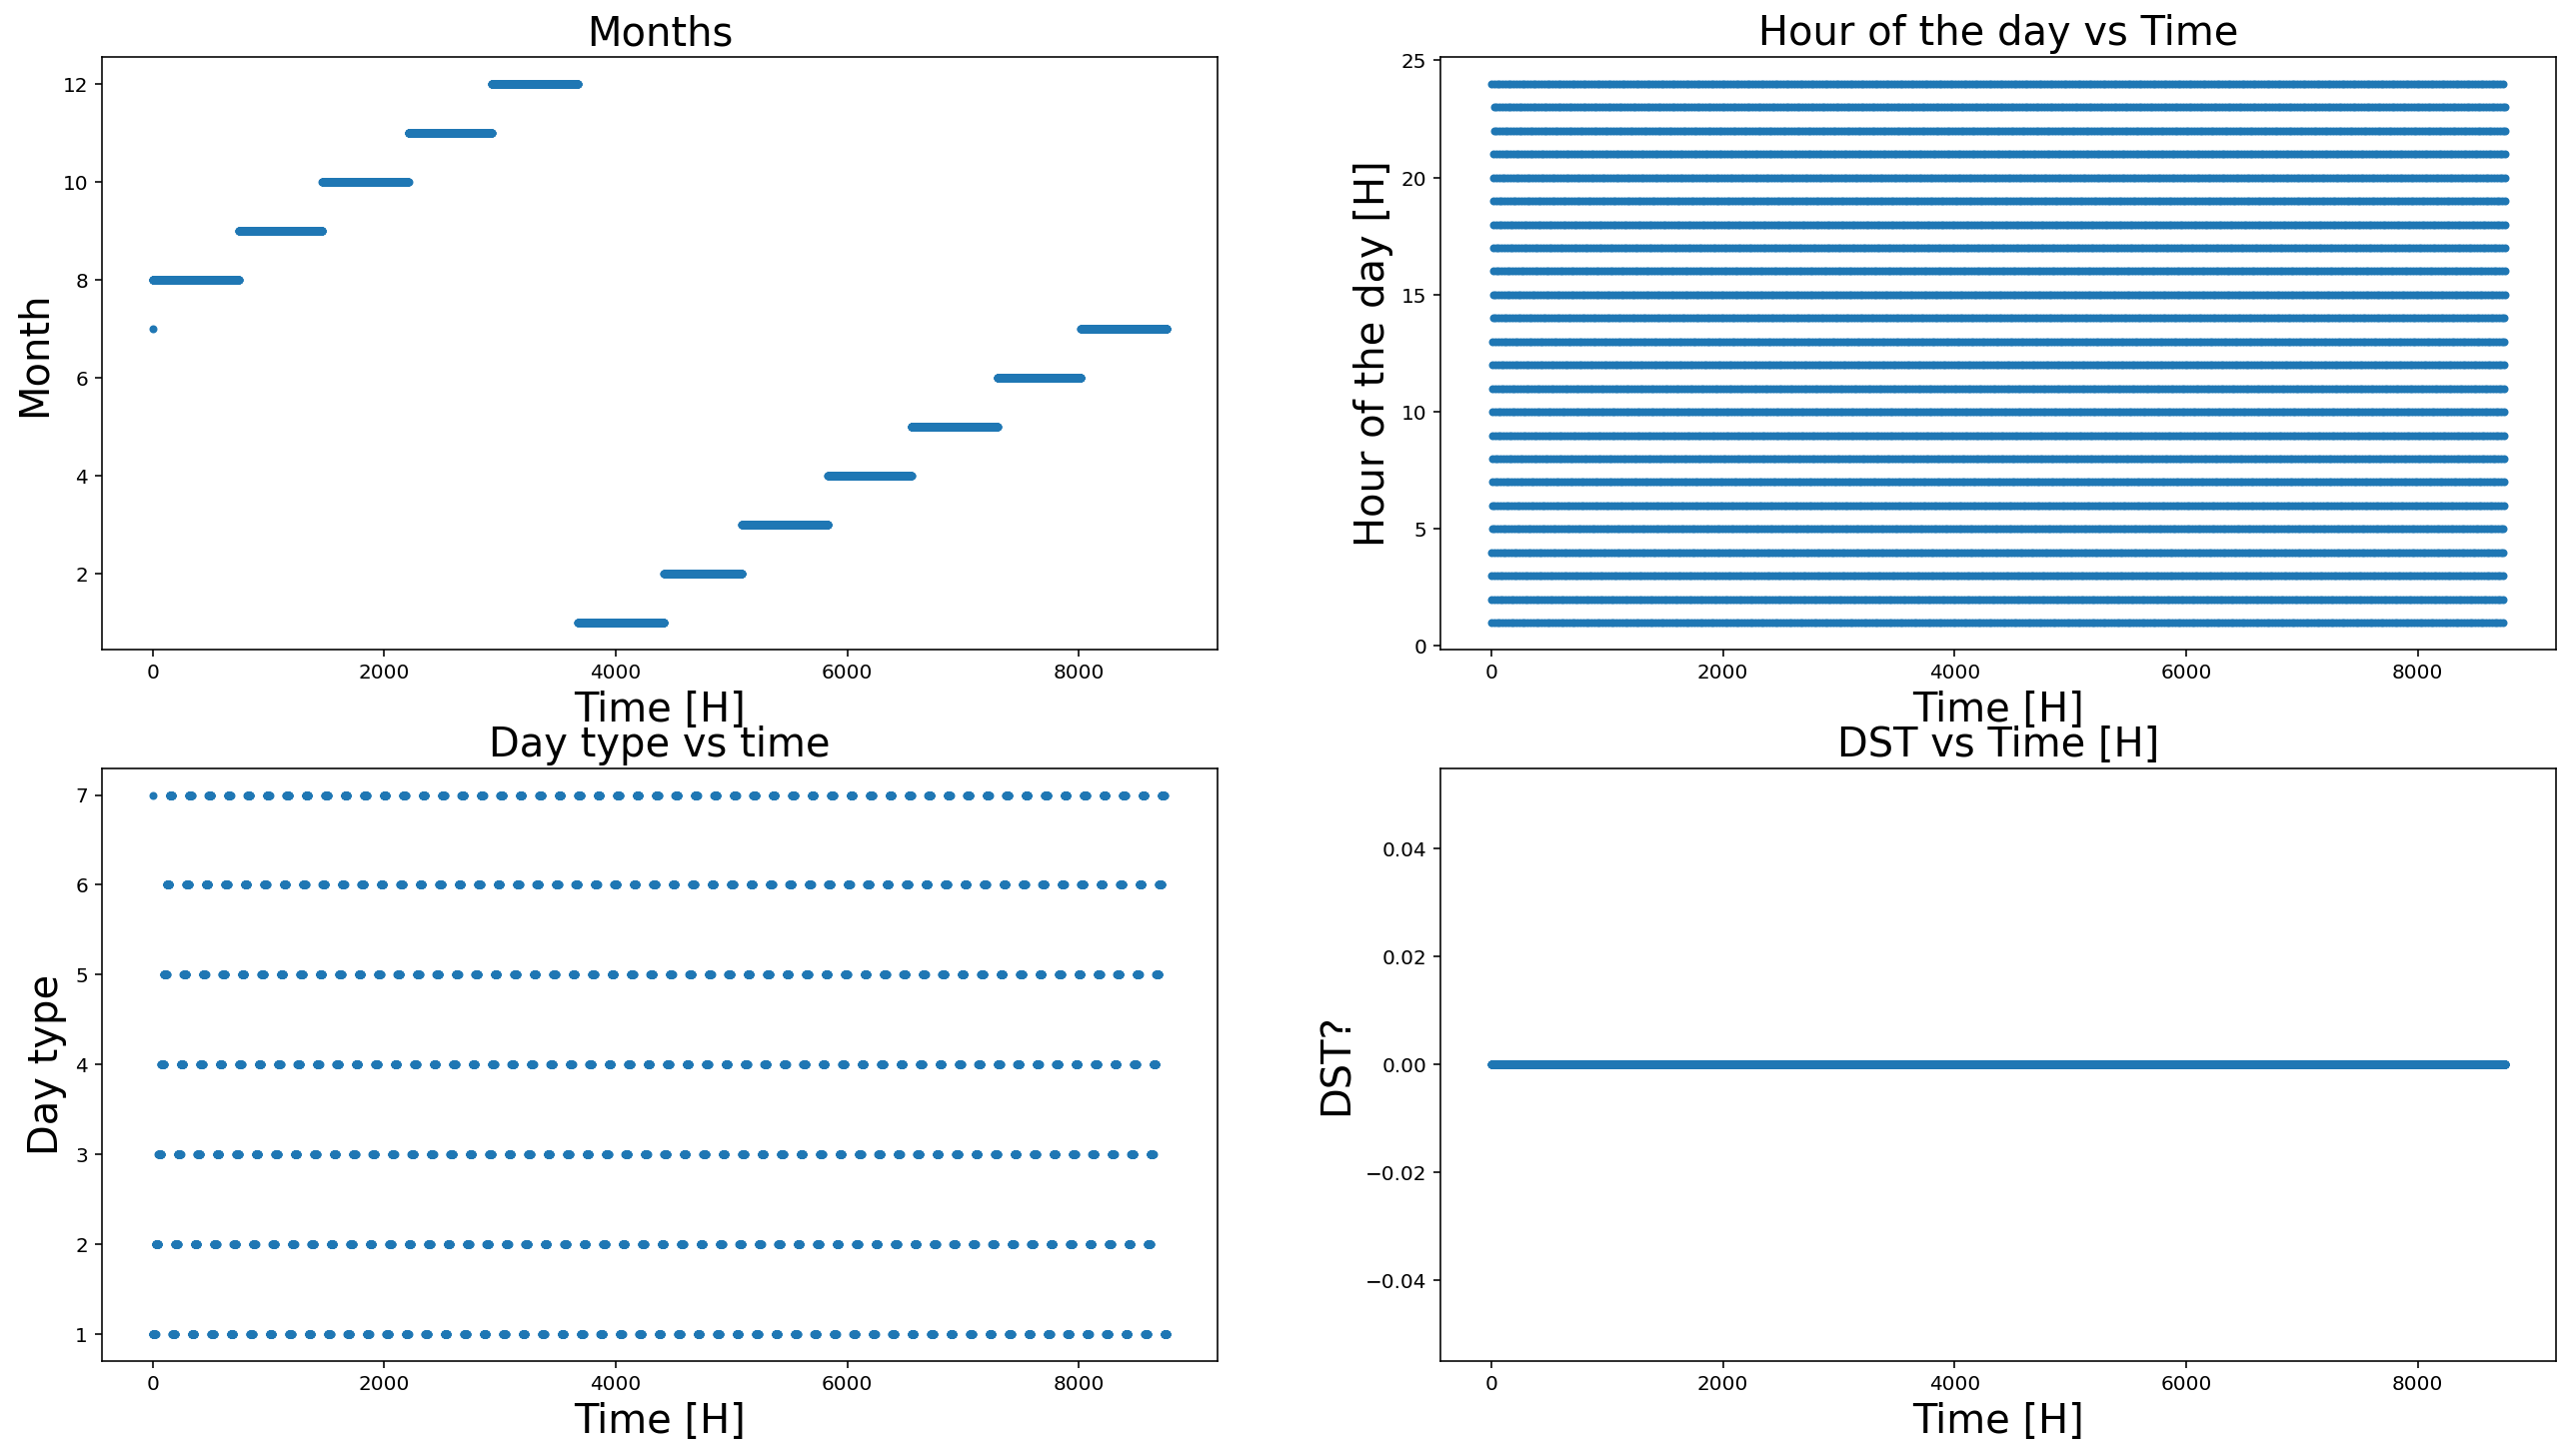

In [ ]:
fig = figure(1, [22, 12])
fig.add_subplot(221)
plot(bd1['Month'],'.')
xlabel('Time [H]', fontsize=20)
ylabel('Month', fontsize=20)
title('Months', fontsize = 20)

fig.add_subplot(222)
plot(bd1['Hour'],'.')
xlabel('Time [H]', fontsize=20)
ylabel('Hour of the day [H]', fontsize=20)
title('Hour of the day vs Time', fontsize = 20)

fig.add_subplot(223)
plot(bd1['Day Type'],'.')
xlabel('Time [H]', fontsize=20)
ylabel('Day type', fontsize=20)
title('Day type vs time', fontsize = 20) 

fig.add_subplot(224)
plot(bd1['Daylight Savings Status'],'.')
xlabel('Time [H]', fontsize=20)
ylabel('DST?', fontsize=20)
title('DST vs Time [H]', fontsize = 20)

In [ ]:
bd1

,Month,Hour,Day Type,Daylight Savings Status,Indoor Temperature [C],Average Unmet Cooling Setpoint Difference [C],Indoor Relative Humidity [%],Equipment Electric Power [kWh],DHW Heating [kWh],Cooling Load [kWh],Heating Load [kWh],Solar Generation [W/kW]
0,7.0,24.0,7.0,0,NaN,NaN,NaN,2.275800,0,0,0,0.000000
1,8.0,1.0,1.0,0,NaN,NaN,NaN,0.851167,0,0,0,0.000000
2,8.0,2.0,1.0,0,NaN,NaN,NaN,0.834600,0,0,0,0.000000
3,8.0,3.0,1.0,0,NaN,NaN,NaN,0.838167,0,0,0,0.000000
4,8.0,4.0,1.0,0,NaN,NaN,NaN,1.478433,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,7.0,19.0,1.0,0,NaN,NaN,NaN,1.346883,0,0,0,8.004167
8756,7.0,20.0,1.0,0,NaN,NaN,NaN,2.566167,0,0,0,0.000000
8757,7.0,21.0,1.0,0,NaN,NaN,NaN,3.151700,0,0,0,0.000000
8758,7.0,22.0,1.0,0,NaN,NaN,NaN,3.021500,0,0,0,0.000000


Text(0.5, 1.0, 'Solar generation')

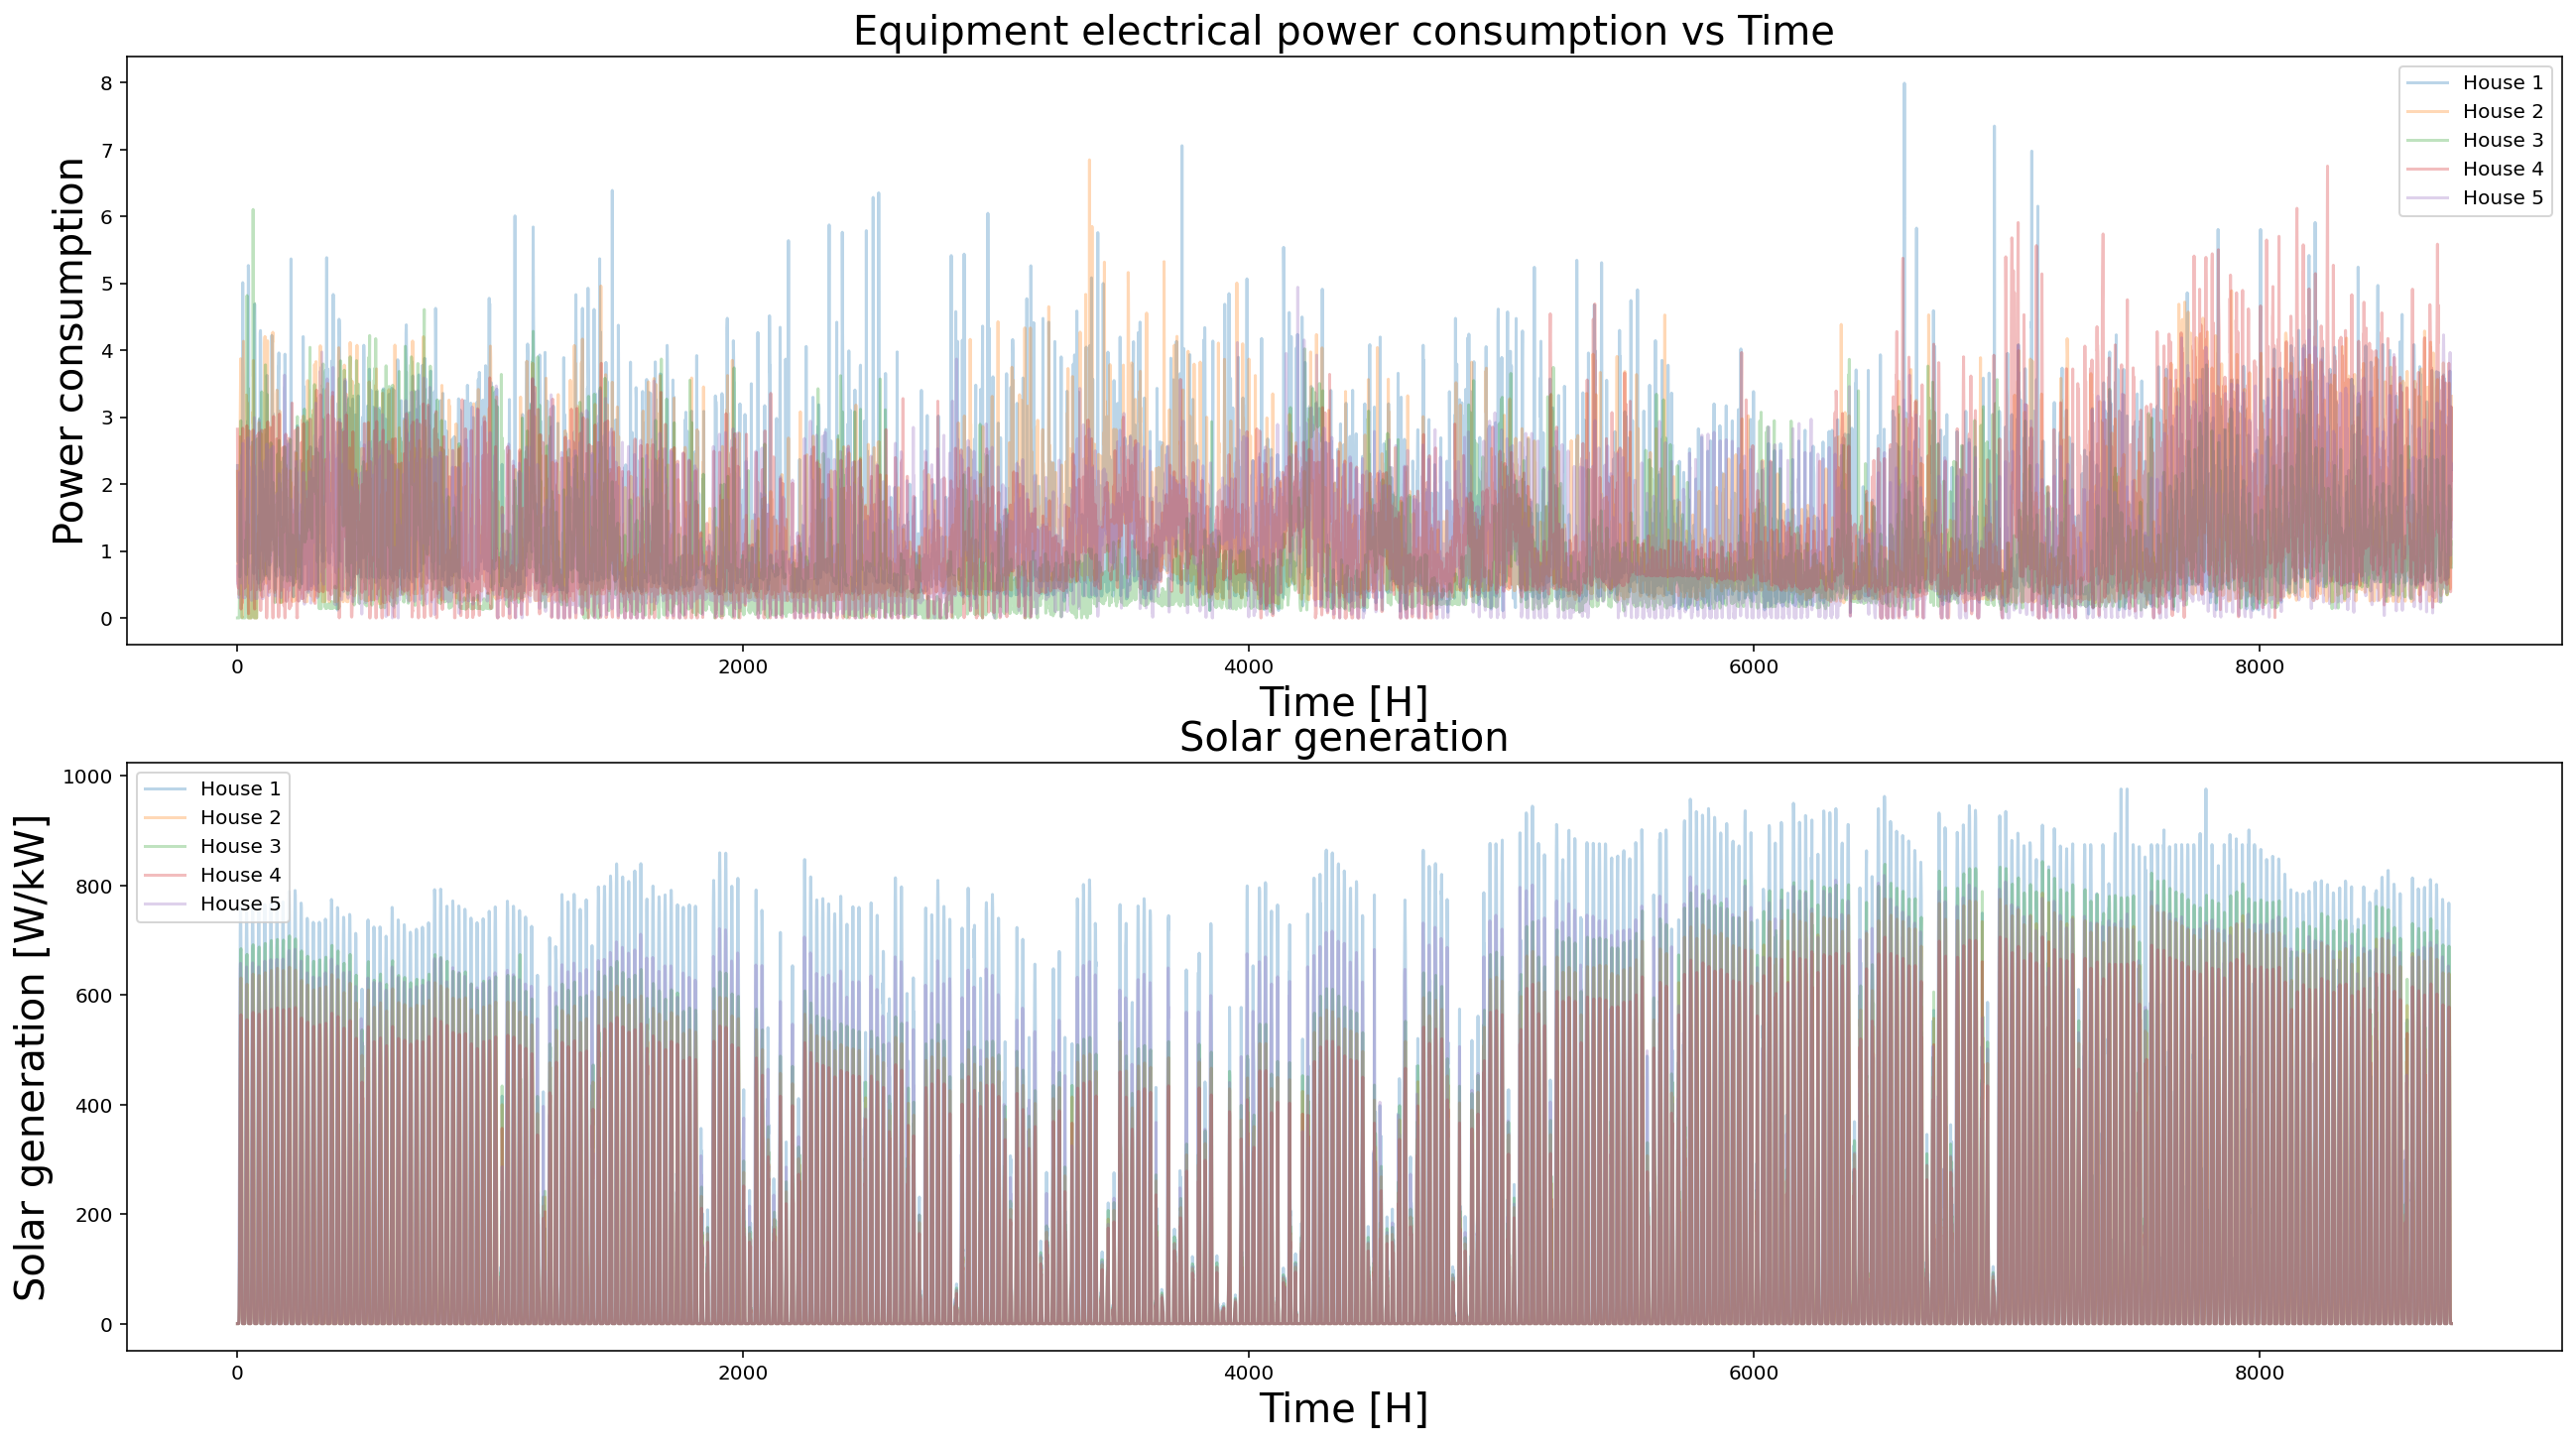

In [ ]:
fig = figure(1, [22, 12])
fig.add_subplot(211)
plot(bd1['Equipment Electric Power [kWh]'],label='House 1', alpha=0.3)
plot(bd2['Equipment Electric Power [kWh]'],label='House 2', alpha=0.3)
plot(bd3['Equipment Electric Power [kWh]'],label='House 3', alpha=0.3)
plot(bd4['Equipment Electric Power [kWh]'],label='House 4', alpha=0.3)
plot(bd5['Equipment Electric Power [kWh]'],label='House 5', alpha=0.3)
plt.legend()
xlabel('Time [H]', fontsize=20)
ylabel('Power consumption', fontsize=20)
title('Equipment electrical power consumption vs Time', fontsize = 20)

fig.add_subplot(212)
plot(bd1['Solar Generation [W/kW]'],label='House 1', alpha=0.3)
plot(bd2['Solar Generation [W/kW]'],label='House 2', alpha=0.3)
plot(bd3['Solar Generation [W/kW]'],label='House 3', alpha=0.3)
plot(bd4['Solar Generation [W/kW]'],label='House 4', alpha=0.3)
plot(bd5['Solar Generation [W/kW]'],label='House 5', alpha=0.3)
plt.legend()
xlabel('Time [H]', fontsize=20)
ylabel('Solar generation [W/kW]', fontsize=20)
title('Solar generation', fontsize = 20)